In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 16:53:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.07s   

2025-10-08 16:53:18 (11.3 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


In [6]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


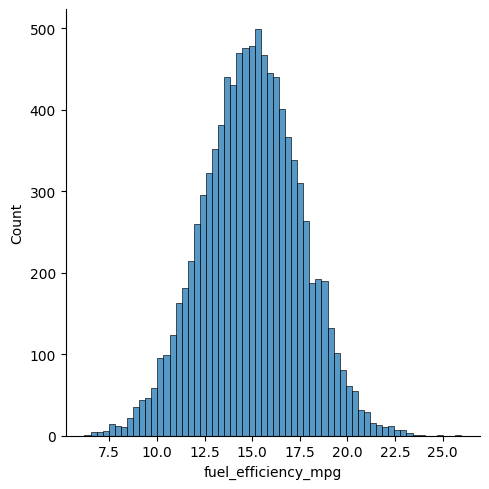

In [7]:
sns.displot(df['fuel_efficiency_mpg'])

In [8]:
np.random.seed(42)

In [9]:
idx = np.arange(len(df))

In [10]:
np.random.shuffle(idx)

In [11]:
test_size = int(len(df) * 0.2)
val_size = int(len(df) * 0.2)
train_size = len(df) - test_size - val_size

In [12]:
train_size, val_size, test_size, train_size + val_size + test_size, len(df)

(5824, 1940, 1940, 9704, 9704)

In [13]:
df_train = df.iloc[idx[:train_size]]
df_val = df.iloc[idx[train_size:train_size + val_size]]
df_test = df.iloc[idx[train_size + val_size:]]

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

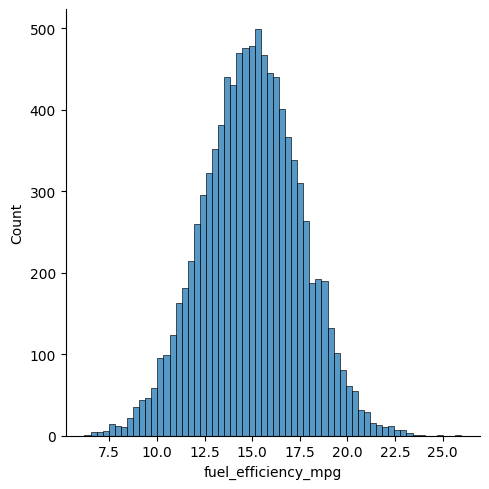

In [15]:
sns.displot(df['fuel_efficiency_mpg'])

In [16]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [18]:
base = ['horsepower', 'num_cylinders', 'acceleration', 'num_doors']

In [19]:
def prepare_X_zeros(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [20]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [21]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [22]:
y_pred = w_0 + X_train.dot(w)

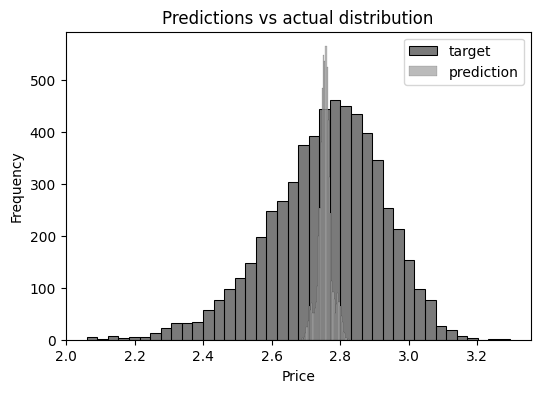

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
round(rmse(y_train, y_pred), 2)

np.float64(0.17)

In [26]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)

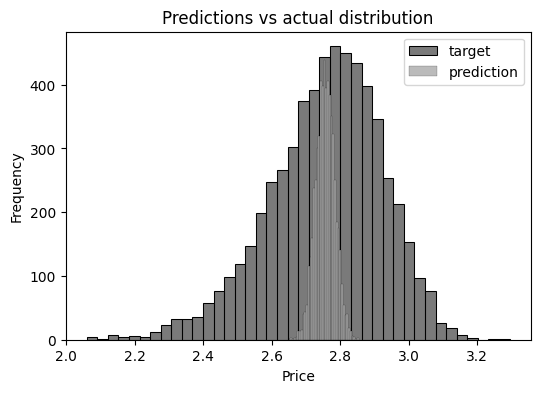

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
round(rmse(y_train, y_pred), 2)

np.float64(0.16)

In [30]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [31]:
X_train = prepare_X_zeros(df_train)

In [32]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[0], w[0]))

    0, 2.76, 0.00, 0.00
0.001, 2.76, 0.00, 0.00
 0.01, 2.76, 0.00, 0.00
  0.1, 2.76, 0.00, 0.00
    1, 2.75, 0.00, 0.00
   10, 2.67, 0.00, 0.00


In [33]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
  X_train = prepare_X_zeros(df_train)
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  y_pred = w_0 + X_train.dot(w)
  print('r = ', r)
  print('train', round(rmse(y_train, y_pred), 2))

  X_val = prepare_X_zeros(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('val', round(rmse(y_val, y_pred), 2))
  print()

r =  0
train 0.17
val 0.17

r =  0.001
train 0.17
val 0.17

r =  0.01
train 0.17
val 0.17

r =  0.1
train 0.17
val 0.17

r =  1
train 0.17
val 0.17

r =  10
train 0.17
val 0.17



In [34]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
  X_train = prepare_X_mean(df_train)
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  y_pred = w_0 + X_train.dot(w)
  print('r = ', r)
  print('train', round(rmse(y_train, y_pred), 2))

  X_val = prepare_X_mean(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('val', round(rmse(y_val, y_pred), 2))
  print()

r =  0
train 0.16
val 0.17

r =  0.001
train 0.16
val 0.17

r =  0.01
train 0.16
val 0.17

r =  0.1
train 0.16
val 0.17

r =  1
train 0.16
val 0.17

r =  10
train 0.17
val 0.18



In [35]:
def get_data(df):
  idx = np.arange(len(df))
  np.random.shuffle(idx)

  test_size = int(len(df) * 0.2)
  val_size = int(len(df) * 0.2)
  train_size = len(df) - test_size - val_size

  df_train = df.iloc[idx[:train_size]]
  df_val = df.iloc[idx[train_size:train_size + val_size]]
  df_test = df.iloc[idx[train_size + val_size:]]

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train_orig = df_train.fuel_efficiency_mpg.values
  y_val_orig = df_val.fuel_efficiency_mpg.values
  y_test_orig = df_test.fuel_efficiency_mpg.values

  y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
  y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
  y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

  del df_train['fuel_efficiency_mpg']
  del df_val['fuel_efficiency_mpg']
  del df_test['fuel_efficiency_mpg']

  return df_train, df_val, df_test, y_train, y_val, y_test

In [36]:
val_scores = []
df = pd.read_csv('car_fuel_efficiency.csv')
# print(df)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(seed)

  df_train, df_val, df_test, y_train, y_val, y_test = get_data(df)
  X_train = prepare_X_zeros(df_train)
  # w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
  y_pred = w_0 + X_train.dot(w)
  print('r = ', r)
  print('train', round(rmse(y_train, y_pred), 3))

  X_val = prepare_X_zeros(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('val', round(rmse(y_val, y_pred), 3))
  print()
  val_scores.append(round(rmse(y_val, y_pred), 3))


r =  10
train 0.181
val 0.179

r =  10
train 0.182
val 0.181

r =  10
train 0.182
val 0.18

r =  10
train 0.181
val 0.183

r =  10
train 0.182
val 0.176

r =  10
train 0.183
val 0.176

r =  10
train 0.182
val 0.181

r =  10
train 0.183
val 0.177

r =  10
train 0.181
val 0.183

r =  10
train 0.182
val 0.179



In [37]:
round(np.std(val_scores), 3)

np.float64(0.002)

In [38]:
val_scores = []
df = pd.read_csv('car_fuel_efficiency.csv')
# print(df)
np.random.seed(9)

df_train, df_val, df_test, y_train, y_val, y_test = get_data(df)
X_train = prepare_X_zeros(df_train)
X_val = prepare_X_zeros(df_val)
X_train = np.vstack([X_train, X_val])
y_train = np.hstack([y_train, y_val])
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_train.dot(w)

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)
print('test', round(rmse(y_test, y_pred), 3))

test 0.165
